In [5]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

    

In [6]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country']=='United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])


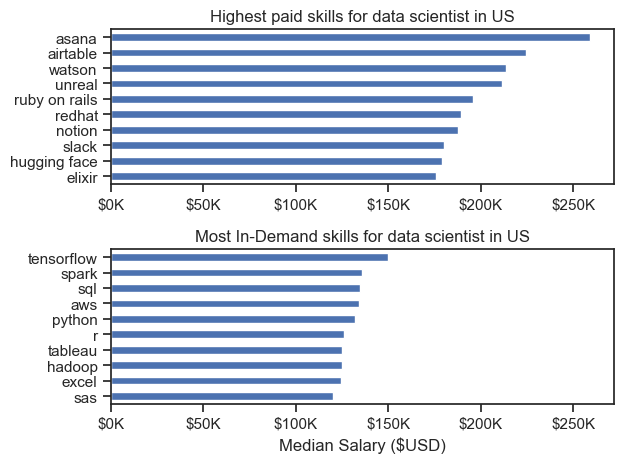

In [7]:

df_DS_US = df_DS_US.explode('job_skills')

df_DS_US_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DS_top_pay =  df_DS_US_group.sort_values(by='median', ascending=False).head(10)
df_DS_skills = df_DS_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

df_DS_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest paid skills for data scientist in US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand skills for data scientist in US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()


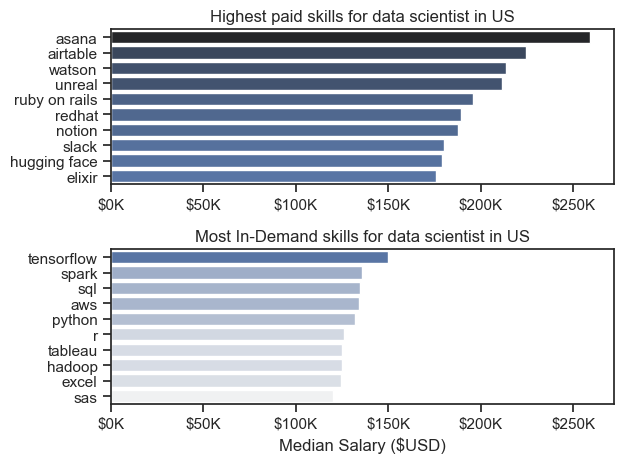

In [8]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
# df_DS_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest paid skills for data scientist in US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
# df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand skills for data scientist in US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()